In [1]:
from sage.all import *
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

In [2]:
import Wigner as wg

In [3]:
mubs = np.load('MUBS/2-2-desarguesian.npy')
mubs.shape

(20, 4)

In [4]:
for i in range(5):
    print('--')
    print(mubs[(4*i):4*(i+1)])

--
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
--
[[ 0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]
 [ 0.5+0.j  0.5+0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]
 [ 0.5+0.j -0.5+0.j  0.5+0.j -0.5+0.j]]
--
[[ 0.5+0.j   0.5+0.j   0.5+0.j   0.5+0.j ]
 [-0.5+0.j  -0.5+0.j   0.5+0.j   0.5+0.j ]
 [ 0. -0.5j  0. +0.5j  0. +0.5j  0. -0.5j]
 [ 0. -0.5j  0. +0.5j  0. -0.5j  0. +0.5j]]
--
[[ 0.5+0.j   0.5+0.j   0.5+0.j   0.5+0.j ]
 [ 0. -0.5j  0. -0.5j  0. +0.5j  0. +0.5j]
 [-0.5+0.j   0.5+0.j   0.5+0.j  -0.5+0.j ]
 [ 0. -0.5j  0. +0.5j  0. -0.5j  0. +0.5j]]
--
[[ 0.5+0.j   0.5+0.j   0.5+0.j   0.5+0.j ]
 [ 0. -0.5j  0. -0.5j  0. +0.5j  0. +0.5j]
 [ 0. -0.5j  0. +0.5j  0. +0.5j  0. -0.5j]
 [-0.5+0.j   0.5+0.j  -0.5+0.j   0.5+0.j ]]


In [5]:
F = GF(2**2, 'a')
F = [0] + [F.gen()**j for j in range(3)]
F

[0, 1, a, a + 1]

In [6]:
mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [7]:
def plotWigner(M, rotate=True):
    if rotate:
        M = np.rot90(M, -1)

    n = np.size(M)
    xpos, ypos = np.meshgrid(range(M.shape[0]), range(M.shape[1]))
    xpos = xpos.T.flatten() - 0.5
    ypos = ypos.T.flatten() - 0.5
    zpos = np.zeros(n)
    dx = dy = 0.8 * np.ones(n)
    dz = np.real(M.flatten())

    z_min = min(dz)
    z_max = max(dz)
    if z_min == z_max:
        z_min -= 0.1
        z_max += 0.1

    norm = mpl.colors.Normalize(z_min, z_max)
    cmap = mpl.colormaps['viridis']
    colors = cmap(norm(dz))

    fig = plt.figure(figsize=(4.5, 3.5))
    # ax = fig.add_subplot(projection='3d', azim=145, elev=35)
    ax = fig.add_subplot(projection='3d', azim=-35, elev=35)

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors)

    # x axis
    ax.axes.xaxis.set_major_locator(plt.IndexLocator(1, -0.1))

    # y axis
    ax.axes.yaxis.set_major_locator(plt.IndexLocator(1, 0.5))
    # ax.invert_yaxis()

    labels_x = [r'$\uparrow\uparrow$',
              r'$\uparrow\downarrow$',
              r'$\downarrow\uparrow$',
              r'$\downarrow\downarrow$']
    labels_y = [r'$\rightarrow\rightarrow$',
              r'$\rightarrow\leftarrow$',
              r'$\leftarrow\rightarrow$',
              r'$\leftarrow\leftarrow$']
    ax.set_xticklabels(labels_x)
    ax.set_yticklabels(labels_y)

    # z axis
    # ax.axes.zaxis.set_major_locator(plt.IndexLocator(1, 0.5))
    ax.set_zlim3d([min(z_min, 0), z_max])
    # ax.set_zlim3d([-0.015, 0.035])

    cax, kw = mpl.colorbar.make_axes(ax, shrink=.75, pad=.2)
    mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm)

    return fig, ax

In [8]:
W = wg.Wigner(F, mubs)

In [9]:
v1 = mubs[0:4,0]

In [10]:
Wv1 = W.WignerMatrix(W.npProj(mubs[:4,0]))
Wv1

array([[0.25, 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  , 0.  ]])

/var/folders/33/k06yq9x95jqcnbk_bh41j4qc0000gn/T/ipykernel_35444/3660196781.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels_x)
/var/folders/33/k06yq9x95jqcnbk_bh41j4qc0000gn/T/ipykernel_35444/3660196781.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels_y)


(<Figure size 450x350 with 2 Axes>, <Axes3D: >)

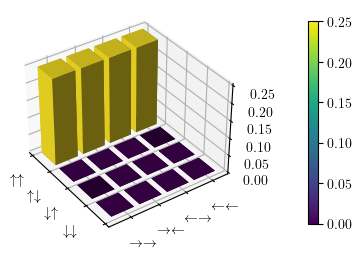

In [11]:
plotWigner(Wv1)

In [12]:
v2 = mubs[0:4,1] - mubs[0:4,2]
v2 = v2 / np.linalg.norm(v2)

In [13]:
Wv2 = W.WignerMatrix(W.npProj(v2))
Wv2

array([[ 0.12499999,  0.12499999,  0.12499999,  0.12499999],
       [-0.12499999,  0.12499999,  0.12499999, -0.12499999],
       [ 0.12499999,  0.12499999,  0.12499999,  0.12499999],
       [-0.12499999,  0.12499999,  0.12499999, -0.12499999]])

/var/folders/33/k06yq9x95jqcnbk_bh41j4qc0000gn/T/ipykernel_35444/3660196781.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels_x)
/var/folders/33/k06yq9x95jqcnbk_bh41j4qc0000gn/T/ipykernel_35444/3660196781.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels_y)


(<Figure size 450x350 with 2 Axes>, <Axes3D: >)

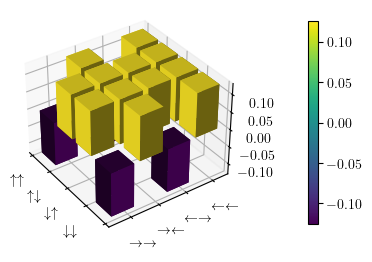

In [14]:
plotWigner(Wv2)

In [15]:
Wv2[3,:].sum()

0.0

In [16]:
np.abs(mubs[4:8,0].conj().T @ v2)**2

0.0

In [17]:
v3 = mubs[12:16,0]
Wv3 = W.WignerMatrix(W.npProj(v3))
Wv3.round(3)

array([[0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.25],
       [0.25, 0.  , 0.  , 0.  ]])

/var/folders/33/k06yq9x95jqcnbk_bh41j4qc0000gn/T/ipykernel_35444/3660196781.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels_x)
/var/folders/33/k06yq9x95jqcnbk_bh41j4qc0000gn/T/ipykernel_35444/3660196781.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels_y)


(<Figure size 450x350 with 2 Axes>, <Axes3D: >)

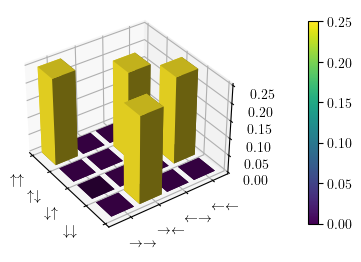

In [18]:
plotWigner(Wv3)

Estado GHZ.

In [20]:
ghz = (mubs[0:4, 0] + mubs[0:4, 3]) / np.sqrt(2)
ghz

array([0.70710677+0.j, 0.        +0.j, 0.        +0.j, 0.70710677+0.j],
      dtype=complex64)

In [21]:
Wghz = W.WignerMatrix(W.npProj(ghz))
Wghz

array([[ 0.12499999, -0.12499999, -0.12499999,  0.12499999],
       [ 0.12499999,  0.12499999,  0.12499999,  0.12499999],
       [ 0.12499999, -0.12499999, -0.12499999,  0.12499999],
       [ 0.12499999,  0.12499999,  0.12499999,  0.12499999]])

/var/folders/33/k06yq9x95jqcnbk_bh41j4qc0000gn/T/ipykernel_35444/3660196781.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels_x)
/var/folders/33/k06yq9x95jqcnbk_bh41j4qc0000gn/T/ipykernel_35444/3660196781.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels_y)


(<Figure size 450x350 with 2 Axes>, <Axes3D: >)

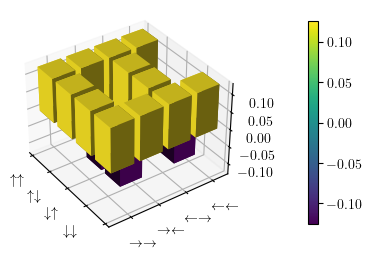

In [22]:
plotWigner(Wghz)

In [28]:
np.abs(mubs[4:8,3].conj() @ ghz)**2

0.0